# NOTEBOOK OF CNN MODEL

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [40]:
train_datagen=ImageDataGenerator(validation_split=0.1,
                                rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)

path="C:/Users/Aryan Chauhan/Desktop/AIO/Gesture/TRAIN"
train=train_datagen.flow_from_directory(directory=path,target_size=(64,64),batch_size=32,class_mode="categorical",
                                        subset='training',shuffle=True,color_mode='grayscale')
val=train_datagen.flow_from_directory(directory=path,target_size=(64,64),batch_size=32,class_mode='categorical',
                                      subset='validation',color_mode='grayscale')

Found 7046 images belonging to 26 classes.
Found 780 images belonging to 26 classes.


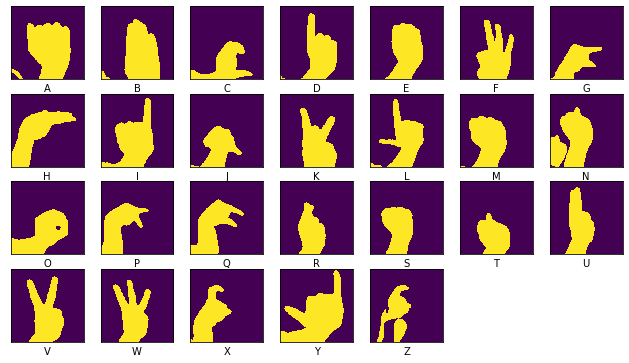

In [33]:
train_dir="C:/Users/Aryan Chauhan/Desktop/AIO/Gesture/TRAIN"
plt.figure(figsize=(11,11))
count=0
lis=os.listdir(train_dir)
for i in lis:
    count+=1
    img_lis=os.listdir(train_dir+"/"+i)
    #print(img_lis)
    for j in img_lis:
        plt.subplot(7,7,count)
        plt.xticks([])
        plt.yticks([])
        image=plt.imread(train_dir+"/"+i+"/"+j)
        plt.imshow(image)
        plt.xlabel(i)
        break


In [37]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(64,64,1),activation='relu'))
#model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
#model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu"))
#model.add(Conv2D(filters=512,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=26,activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 128)      

In [41]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [42]:
filepath='C:/Users/Aryan Chauhan/Desktop/AIO/GESTURE'
#steps_per_epochs=5
epochs=50
CallBack=tf.keras.callbacks.ModelCheckpoint(filepath=filepath,monitor='val_accuracy',verbose=1,save_best_only=True)
model.fit_generator(train,epochs=epochs,steps_per_epoch=30,validation_data=val,callbacks=[CallBack])

C:\Users\Aryan Chauhan\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 56s 2s/step - loss: 3.1449 - accuracy: 0.0754 - val_loss: 2.7089 - val_accuracy: 0.1679

Epoch 00001: val_accuracy improved from -inf to 0.16795, saving model to C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE
INFO:tensorflow:Assets written to: C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE\assets
Epoch 2/50
30/30 [==============================] - 55s 2s/step - loss: 2.3707 - accuracy: 0.2838 - val_loss: 2.0538 - val_accuracy: 0.3859

Epoch 00002: val_accuracy improved from 0.16795 to 0.38590, saving model to C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE
INFO:tensorflow:Assets written to: C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE\assets
Epoch 3/50
30/30 [==============================] - 55s 2s/step - loss: 1.4678 - accuracy: 0.5134 - val_loss: 2.2169 - val_accuracy: 0.4577

Epoch 00003: val_accuracy improved from 0.38590 to 0.45769, saving model to C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE
INFO:tensorflow:Assets written to: C:/Users/Aryan Cha

30/30 [==============================] - 54s 2s/step - loss: 0.1037 - accuracy: 0.9660 - val_loss: 1.1319 - val_accuracy: 0.7474

Epoch 00029: val_accuracy did not improve from 0.79872
Epoch 30/50
30/30 [==============================] - 55s 2s/step - loss: 0.1042 - accuracy: 0.9612 - val_loss: 0.9696 - val_accuracy: 0.7936

Epoch 00030: val_accuracy did not improve from 0.79872
Epoch 31/50
30/30 [==============================] - 55s 2s/step - loss: 0.0839 - accuracy: 0.9703 - val_loss: 0.9786 - val_accuracy: 0.7872

Epoch 00031: val_accuracy did not improve from 0.79872
Epoch 32/50
30/30 [==============================] - 53s 2s/step - loss: 0.0727 - accuracy: 0.9631 - val_loss: 0.8623 - val_accuracy: 0.8372

Epoch 00032: val_accuracy improved from 0.79872 to 0.83718, saving model to C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE
INFO:tensorflow:Assets written to: C:/Users/Aryan Chauhan/Desktop/AIO\GESTURE\assets
Epoch 33/50
30/30 [==============================] - 54s 2s/step - loss: 0.

In [43]:
model.save("ASL_CNN_MODEL1.h5")